## BA1K : Generate the Frequency Array of a String

[2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0]


<BarContainer object of 16 artists>

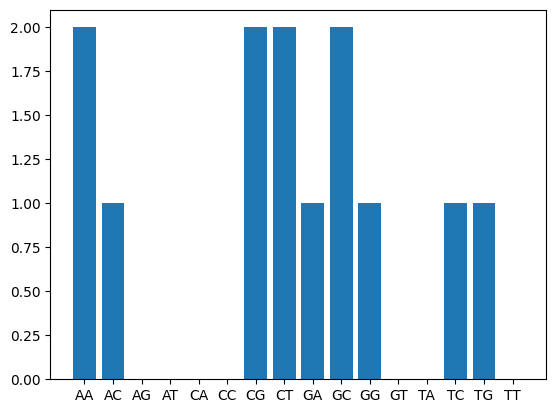

In [203]:
genome = "ACGCGGCTCTGAAA"
k = 2

kmers = []

def createKmers(kmer):
    if len(kmer) == k:
        kmers.append(kmer)
        return
    createKmers(kmer+'A')
    createKmers(kmer+'C')
    createKmers(kmer+'G')
    createKmers(kmer+'T')

createKmers("")

freq = [0]*(4**k)

for i in range(len(kmers)):
    kmer = kmers[i]
    count = 0
    for j in range(len(genome) - k + 1):
        sub = genome[j:j+k]
        if sub == kmer:
            count += 1
    freq[i] = count
print(freq)

import matplotlib.pyplot as plt

# x = list(range(len(kmers)))
# plt.plot(x,freq,marker="o")
# plt.xticks(x,kmers)
plt.bar(kmers, freq)

## BA1L : Implement PatternToNumber

In [22]:
pattern = "AGT"

sum = 0

dic = {'A':0,'C':1,'G':2,'T':3}

for i,base in enumerate(pattern[::-1]):
    sum += dic[base]*(4**i)
sum

11

## BA1M : Implement NumberToPattern

In [24]:
number = 45
k = 4

pattern = ""

dic = {0:'A',1:'C',2:'G',3:'T'}

for i in range(k):
    remainder = number % 4
    pattern = dic[remainder] + pattern
    number //=4
print(pattern)

AGTC


## BA1F : Find a Position in a Genome Minimizing the Skew

([<matplotlib.axis.XTick at 0x19ca9279f50>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'A'),
  Text(2, 0, 'T'),
  Text(3, 0, 'G'),
  Text(4, 0, 'G'),
  Text(5, 0, 'G'),
  Text(6, 0, 'C'),
  Text(7, 0, 'A'),
  Text(8, 0, 'T'),
  Text(9, 0, 'C'),
  Text(10, 0, 'G'),
  Text(11, 0, 'G'),
  Text(12, 0, 'C'),
  Text(13, 0, 'C'),
  Text(14, 0, 'A'),
  Text(15, 0, 'T'),
  Text(16, 0, 'A'),
  Text(17, 0, 'C'),
  Text(18, 0, 'G'),
  Text(19, 0, 'C'),
  Text(20, 0, 'C')])

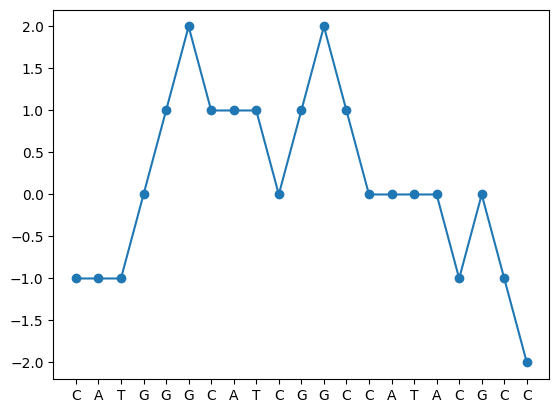

In [53]:
def min_skew(genome):
    minskew = float("inf")
    curskew = 0
    minpos = []
    skewval = []

    for i,v in enumerate(genome):
        if v == 'G':
            curskew += 1
        elif v == 'C':
            curskew -= 1
        if curskew < minskew:
            minskew = curskew
            minpos = [i+1]
        elif curskew == minskew:
            minpos.append(i+1)
        skewval.append(curskew)
    return minpos, skewval

genome = "CATGGGCATCGGCCATACGCC"
minpos,skew = min_skew(genome)

import matplotlib.pyplot as plt
x = list(range(len(genome)))
plt.plot(x,skew,marker="o")
plt.xticks(x,genome)

## BA1N : Generate the d-Neighborhood of a String

In [57]:
pattern = "ACG"
d = 1
k = len(pattern)

kmers = []

def createKmers(kmer):
    if len(kmer) == k:
        kmers.append(kmer)
        return
    createKmers(kmer+'A')
    createKmers(kmer+'C')
    createKmers(kmer+'G')
    createKmers(kmer+'T')

createKmers("")

def hamming(s,t):
    total = 0
    for p1,p2 in zip(s,t):
        if p1 != p2:
            total += 1
    return total

results = []

for kmer in kmers:
    if hamming(kmer,pattern) <= d:
        results.append(kmer)
for result in results:
    print(result)

AAG
ACA
ACC
ACG
ACT
AGG
ATG
CCG
GCG
TCG


## BA1J : Find Frequent Words with Mismatches and Reverse Complements

In [202]:
from Bio.Seq import Seq

with open("BA1J.txt","r") as file:
    text = file.readline()
    k,d = file.readline().replace("\n","").split()
    k = int(k)
    d = int(d)


patterns = []

def createPatterns(pattern):
    if len(pattern) == k:
        patterns.append(pattern)
        return
    createPatterns(pattern+'A')
    createPatterns(pattern+'C')
    createPatterns(pattern+'G')
    createPatterns(pattern+'T')

createPatterns("")

def hamming(s,t):
    total = 0
    for a,b in zip(s,t):
        if a != b:
            total += 1
    return total

dic = {}

for pattern in patterns:
    count = 0
    for i in range(len(text) - k +1):
        sub = text[i:i+k]
        if hamming(sub,pattern) <= d:
            count += 1
    dic[pattern] = count

result = []

gmax = float("-inf")

for pattern in dic:
    total = dic[pattern] + dic[Seq(pattern).reverse_complement()]
    if total > gmax:
        result = [pattern]
        gmax = total
    elif total == gmax:
        result.append(pattern)
print(*result)


ACAT ATGT


## BA2B : Find a Median String

In [29]:
with open("BA2B.txt","r") as file:
    k = file.readline()
    k = int(k)
    dnas = [text.replace("\n","") for text in file.readlines()]
    
kmers = []
createKmers("")
gmax = float("inf")
result = ""

for kmer in kmers:
    total = 0

    for dna in dnas:
        mn = float("inf")
        for i in range(len(dna) - k +1):
            subdna = dna[i:i+k]
            d = hamming(subdna,kmer)
            if d < mn:
                mn = d
        total += mn
    if total < gmax:
        gmax = total
        result = kmer
result

'ACG'

## BA2C : Find a Profile-most Probable k-mer in a String

In [46]:
with open("BA2C.txt","r") as file:
    text = file.readline().replace("\n","")
    k = file.readline()
    k = int(k)
    profile = file.readlines()
    profile = [[float(x) for x in line.replace("\n","").split()] for line in profile]
    dic['A'] = profile[0]
    dic['C'] = profile[1]
    dic['G'] = profile[2]
    dic['T'] = profile[3]

gmax = float("-inf")
kmer = ""


for i in range(len(text) - k +1):
    sub = text[i:i+k]
    prob = 1
    for j in range(len(sub)):
        prob *= dic[sub[j]][j]
    if prob > gmax:
        gmax = prob
        kmer = sub
kmer

ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT


'CCGAG'

## BA2D : Implement GreedyMotifSearch

In [49]:
with open("BA2D.txt","r") as file:
    k,t = file.readline().strip().replace("\n","").split()
    k = int(k)
    t = int(d)
    dnas = [line.replace("\n","") for line in file.readlines()]

def buildProfile(motifs,k):
    profile = [[0]*k for _ in range(4)]
    dic = {'A':0,'C':1,'G':2,'T':3}

    for motif in motifs:
        for i in range(k):
            profile[dic[motif[i]]][i] += 1
    total = len(motifs)

    for i in range(4):
        for j in range(k):
            profile[i][j] = profile[i][j]/total

    return profile

def bestKmer(dna,profile,k):
    kmer = ""
    gmax = float("-inf")

    dic = {'A':0,'C':1,'G':2,'T':3}

    for i in range(len(dna) - k + 1):
        subdna = dna[i:i+k]
        prob = 1
        
        for j in range(len(subdna)):
            prob *= profile[dic[subdna[j]]][j]
        if prob > gmax:
            gmax = prob
            kmer = subdna
    return kmer

def score(motifs,k):
    total = 0

    for i in range(k):
        dic = {'A':0,'C':0,'G':0,'T':0}
        for motif in motifs:
            dic[motif[i]] += 1
        max_val = max(dic.values())
        total += (len(motifs)-max_val)
    return total

def greedy(dnas,k,t):
    bests = []
    for dna in dnas:
        bests.append(dna[0:k])
    for i in range(len(dnas[0]) - k + 1):
        motif1 = dnas[0][i:i+k]
        motifs = []
        motifs.append(motif1)

        for j in range(1,t):
            profile = buildProfile(motifs,k)
            best_kmer = bestKmer(dnas[j],profile,k)
            motifs.append(best_kmer)
        if score(motifs,k) < score(bests,k):
            bests = motifs
    return bests

ans = greedy(dnas,k,t)
ans

['CAG', 'CAG', 'CAA', 'CAA', 'CAA']

## BA2E : Implement GreedyMotifSearch with Pseudocounts

In [54]:
with open("BA2D.txt","r") as file:
    k,t = file.readline().strip().replace("\n","").split()
    k = int(k)
    t = int(d)
    dnas = [line.replace("\n","") for line in file.readlines()]

def buildProfile(motifs,k):
    profile = [[0]*k for _ in range(4)]
    pseudo = [[1]*k for _ in range(4)]
    dic = {'A':0,'C':1,'G':2,'T':3}

    for motif in motifs:
        for i in range(k):
            pseudo[dic[motif[i]]][i] += 1
    total = len(motifs)

    for i in range(4):
        for j in range(k):
            profile[i][j] = pseudo[i][j]/(total+4)

    return profile

def bestKmer(dna,profile,k):
    kmer = ""
    gmax = float("-inf")

    dic = {'A':0,'C':1,'G':2,'T':3}

    for i in range(len(dna) - k + 1):
        subdna = dna[i:i+k]
        prob = 1
        
        for j in range(len(subdna)):
            prob *= profile[dic[subdna[j]]][j]
        if prob > gmax:
            gmax = prob
            kmer = subdna
    return kmer

def score(motifs,k):
    total = 0

    for i in range(k):
        dic = {'A':0,'C':0,'G':0,'T':0}
        for motif in motifs:
            dic[motif[i]] += 1
        max_val = max(dic.values())
        total += (len(motifs)-max_val)
    return total

def greedy(dnas,k,t):
    bests = []
    for dna in dnas:
        bests.append(dna[0:k])
    for i in range(len(dnas[0]) - k + 1):
        motif1 = dnas[0][i:i+k]
        motifs = []
        motifs.append(motif1)

        for j in range(1,t):
            profile = buildProfile(motifs,k)
            best_kmer = bestKmer(dnas[j],profile,k)
            motifs.append(best_kmer)
        if score(motifs,k) < score(bests,k):
            bests = motifs
    return bests

ans = greedy(dnas,k,t)
ans

['TTC', 'ATC', 'TTC', 'ATC', 'TTC']

## BA2F : Implement RandomizedMotifSearch

In [62]:
import random

with open("BA2F.txt","r") as file:
    k,t = file.readline().strip().replace("\n","").split()
    k = int(k)
    t = int(d)
    dnas = [line.replace("\n","") for line in file.readlines()]

def generateRandoms(dnas,k):
    motifs = []

    for dna in dnas:
        i = random.randint(0,len(dna)-k)
        motifs.append(dna[i:i+k])
    return motifs

def bestKmers(profile,dnas,k):
    kmers = []
    dic = {'A':0,'C':1,'G':2,'T':3}

    for dna in dnas:
        kmer = ""
        gmax = float("-inf")
        
        for i in range(len(dna)-k+1):
            subdna = dna[i:i+k]
            prob = 1
            for j in range(k):
                prob *= profile[dic[subdna[j]]][j]
            if prob > gmax:
                gmax = prob
                kmer = subdna
        kmers.append(kmer)
    
    return kmers




def randomized(dnas,k):
    bests = randoms = generateRandoms(dnas,k)

    while True:
        profile = buildProfile(randoms,k)
        randoms = bestKmers(profile,dnas,k)
        if score(randoms,k) < score(bests,k):
            bests = randoms
        else:
            return bests

def search(dnas,k,iter):
    bests = randomized(dnas,k)

    for _ in range(iter-1):
        another = randomized(dnas,k)
        if score(another,k) < score(bests,k):
            bests = another
    return bests
    

ans = search(dnas,k,1000)
print(ans)

['TCTCGGGG', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG']


## BA2H : Implement DistanceBetweenPatternAndStrings

In [65]:
with open("BA2H.txt","r") as file:
    pattern = file.readline().strip().replace("\n","")
    strings = [text.replace("\n","") for text in file.readline().replace("\n","").split()]

total = 0

for string in strings:
    gmin = float("inf")
    for i in range(len(string)-len(pattern)+1):
        sub = string[i:i+len(pattern)]
        d = hamming(sub,pattern)
        if d < gmin:
            gmin = d
    total += gmin
total

5

## BA3E : Construct the De Bruijn Graph of a Collection of k-mers

In [205]:
with open("BA3E.txt","r") as file:
    kmers = [text.replace("\n","") for text in file.readlines()]

def debrujin(kmers):
    dic = {}

    for kmer in kmers:
        suffix = kmer[1:]
        prefix = kmer[:-1]
        if prefix not in dic:
            dic[prefix] = []
        dic[prefix].append(suffix)
    return dic

ans = debrujin(kmers)
ans = sorted(ans.items(),key=lambda x: x[0])
ans = {key:value for key,value in ans}

for key, value in ans.items():
    print(key, "->", ",".join(value))

AGG -> GGG
CAG -> AGG,AGG
GAG -> AGG
GGA -> GAG
GGG -> GGG,GGA


## BA3G : Find an Eulerian Path in a Graph

In [206]:
with open("BA3G.txt","r") as file:
    dic = {}
    input = file.readlines()

    for i in range(len(input)):
        l = input[i].replace("\n","")
        key,nodes = l.split(" -> ")
        key = int(key)
        nodes = [int(num) for num in nodes.split(",")]
        dic[key] = nodes

graph = dic.copy()

def euler(graph):
    inds = {}
    outs = {}

    for node,values in graph.items():
        outs[node] = outs.get(node,0) + len(values)
        for neighbor in values:
            inds[neighbor] = inds.get(neighbor,0) + 1
    start = None

    for node in outs:
        if node not in inds or inds[node] < outs[node]:
            start = node
            break
    return start 

def dfs(graph,start,s):
    if start in graph:
        neighbors = list(graph[start])
        for neighbor in neighbors:
            if neighbor in graph[start]:
                graph[start].remove(neighbor)
                s = dfs(graph,neighbor,s)
    s += str(start)
    return s


start = euler(graph)

ans = dfs(graph,start,"")
ans = ans[::-1]

print("->".join(ans))


6->7->8->9->6->3->0->2->1->3->4


## BA4B : Find Substrings of a Genome Encoding a Given Amino Acid String

In [207]:
from Bio.Seq import Seq

genome = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
amino = "MA"
k = len(amino)*3

for i in range(len(genome)-k+1):
    sub = genome[i:i+k]
    if Seq(sub).translate() == amino or Seq(sub).reverse_complement().translate() == amino:
        print(sub)

ATGGCC
GGCCAT
ATGGCC


## BA4C : Generate the Theoretical Spectrum of a Cyclic Peptide

In [111]:
with open("mass_table.txt","r") as file:
    input = file.readlines()
    mass_table = {'':0}

    for i in range(len(input)):
        line = input[i]
        key,value = line.replace("\n","").split()
        value = int(value)
        mass_table[key] = value
        
peptide = "LEQN"

allSeqs = [""]

def genAllSeqs(peptide2):
    for ln in range(1,len(peptide)):
        for ind in range(len(peptide)):
            allSeqs.append(peptide2[ind:ind+ln])

genAllSeqs(peptide+peptide)
allSeqs.append(peptide)

masses = []

for seq in allSeqs:
    total = 0
    for s in seq:
        total += mass_table[s]
    masses.append(total)
sorted(masses)

[0, 113, 114, 128, 129, 227, 242, 242, 257, 355, 356, 370, 371, 484]

## BA4D : Compute the Number of Peptides of Given Total Mass

14712706211

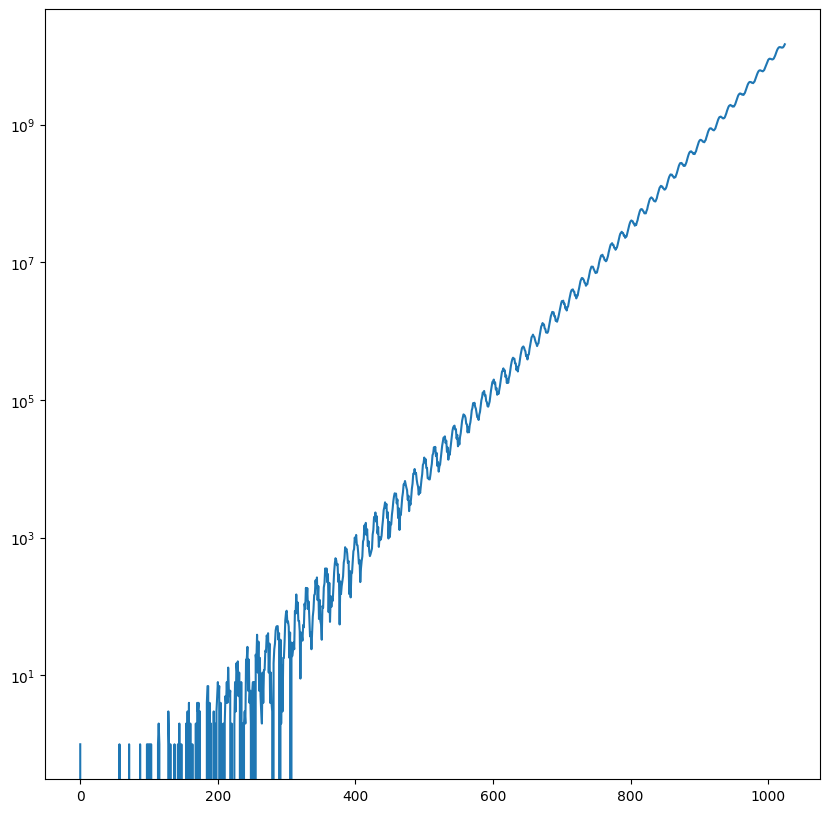

In [223]:
import matplotlib.pyplot as plt

with open("mass_table.txt","r") as file:
    input = file.readlines()
    mass_table = {'':0}

    for i in range(len(input)):
        line = input[i]
        key,value = line.replace("\n","").split()
        value = int(value)
        mass_table[key] = value
del mass_table[""]
masses = list(set(mass_table.values()))

def calcTotal(total,mass_table):
    dp = [0]*(total+1)
    dp[0] = 1

    for i in range(total+1):
        cursum = 0
        for j in mass_table:
            if i - j >= 0:
                cursum += dp[i-j]
        dp[i] += cursum
    plt.figure(figsize=(10,10))
    plt.yscale('log')
    plt.plot(dp)

    return dp[total]

total = 1024

total_ways = calcTotal(total,masses)
total_ways

## BA4H : Generate the Convolution of a Spectrum

In [137]:
with open("BA4H.txt","r") as file:
    masses = [int(num) for num in file.readline().replace("\n","").split()]

diffs = []

dic = {}

for i in range(len(masses)):
    for j in range(i+1,len(masses)):
        diffs.append(abs(masses[i]-masses[j]))
for diff in diffs:
    dic[diff] = dic.get(diff,0) + 1
dic = sorted(dic.items(),key=lambda x: x[1], reverse=True)
dic = {key:value for key,value in dic}

result = []

for key,value in dic.items():
    for i in range(value):
        result.append(key)
print(" ".join(map(str,result)))

137 137 186 186 323 49


## BA5A : Find the Minimum Number of Coins Needed to Make Change

In [141]:
with open("BA5A.txt","r") as file:
    money = int(file.readline().strip().replace("\n",""))
    coins = [int(num) for num in  file.readline().strip().replace("\n","").split(",")]

dp = [1000]*(money+1)
dp[0] = 0

for i in range(money+1):
    for coin in coins:
        if i == coin:
            dp[i] = 1
        elif i > coin:
            dp[i] = min(dp[i],dp[i-coin]+1)
print(dp[money])

2


## BA5G : Compute the Edit Distance Between Two Strings

In [224]:
x = "PLEASANTLY" 
y = "MEANLY" 

def distance(x,y):
    row = len(x) + 1
    col = len(y) + 1
    dp = [[0]*col for _ in range(row)]
    dp[0][0] = 0

    for i in range(row):
        dp[i][0] = i
    for i in range(col):
        dp[0][i] = i
    
    x = 'a'+x
    y = 'a'+y
    for i in range(1,row):
        for j in range(1,col):
            if x[i] == y[j]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = min([dp[i][j-1],dp[i-1][j],dp[i-1][j-1]]) + 1
    return dp[row-1][col-1]


ans = distance(x,y)
ans

5

## BA6A : Implement GreedySorting to Sort a Permutation by Reversals

In [225]:
with open("BA6A.txt","r") as file:
    input = file.readline().strip().replace("\n","")

def rev_neg(l,i,j):
    return l[:i] + list(-x for x in reversed(l[i:j+1])) + l[j+1:]

def perm(input):
    l = [int(num) for num in input.replace("(","").replace(")","").split()]
    output = []

    for i in range(len(l)):
        if abs(l[i]) != i+1:
            ind = l.index(i+1 if i+1 in l else -(i+1))
            l = rev_neg(l,i,ind)
        output.append(l.copy())
        if l[i] < 0:
            l[i] = -l[i]
            output.append(l.copy())
    
    return output

ans = perm(input)
for a in ans:
    print("(" + " ".join(map(lambda x: f"+{x}" if x>0 else f"{x}",a)) + ")")

(-1 -4 +3 +5 -2)
(+1 -4 +3 +5 -2)
(+1 +2 -5 -3 +4)
(+1 +2 +3 +5 +4)
(+1 +2 +3 -4 -5)
(+1 +2 +3 +4 -5)
(+1 +2 +3 +4 -5)
(+1 +2 +3 +4 +5)


## BA6B : Compute the Number of Breakpoints in a Permutation

In [156]:
with open("BA6B.txt","r") as file:
    input = [int(num) for num in file.readline().replace("(","").replace(")","").split()]

def breakPoins(input):
    count = 0
    for i in range(1,len(input)):
        if input[i-1]+1 != input[i]:
            count += 1
    if input[0] != 1:
        count += 1
    if input[len(input)-1] != len(input):
        count += 1
    return count

ans = breakPoins(input)
ans

8

## BA6E : Find All Shared k-mers of a Pair of Strings

In [226]:
from Bio.Seq import Seq

with open("BA6E.txt","r") as file:
    k = int(file.readline())
    s = file.readline().replace("\n","")
    t = file.readline().replace("\n","")


def shared_kmers(s,t,k):
    dic = {}
    output = []

    for i in range(len(s)-k+1):
        kmer = s[i:i+k]
        dic[kmer] = i
    for j in range(len(t)-k+1):
        kmer = t[j:j+k]
        rkmer = Seq(kmer).reverse_complement()
        if kmer in dic:
            output.append((dic[kmer],j))
        if rkmer in dic:
            output.append((dic[rkmer],j))
    return output

ans = shared_kmers(s,t,k)
ans = sorted(ans,key=lambda x: x[0])
for a in ans:
    print(a)

(0, 0)
(0, 4)
(4, 2)
(6, 6)


## BA6F : Implement ChromosomeToCycle

In [227]:
with open("BA6F.txt","r") as file:
    input = [int(num) for num in file.readline().replace("(","").replace(")","").split()]

def cromosomeToCycle(input):
    output = []
    for inp in input:
        if inp > 0:
            output.append(2*inp-1)
            output.append(2*inp)
        else:
            output.append(-2*inp)
            output.append(-2*inp-1)
    return output

ans = cromosomeToCycle(input)
print("("+" ".join(map(str,ans))+ ")")

(1 2 4 3 6 5 7 8)


## BA6G : Implement CycleToChromosome

In [199]:
input = "(1 2 4 3 6 5 7 8)".replace("(","").replace(")","").split()
input = [int(num) for num in input]

def cycleToChromosome(input):
    output = []
    i = 0
    l = len(input)

    while i < l:
        a = input[i]
        b = input[i+1]

        if a < b:
            output.append(b // 2)
        else:
            output.append(-a // 2)
        i += 2
    return output

ans = cycleToChromosome(input)
print("(" + " ".join(map(lambda x: f"+{x}" if x>0 else f"{x}",ans)) + ")")

(+1 -2 -3 +4)


## BA6H : Implement ColoredEdges

In [197]:
with open("BA6H.txt","r") as file:
    input = file.readline().replace(")(",")*(")
    input = input.split(")*(")

def cromosomeToCycle(input):
    input = [int(num) for num in input.replace("(","").replace(")","").split()]
    output = []

    for i in input:
        if i>0:
            output.append(2*i-1)
            output.append(2*i)
        else:
            output.append(-2*i)
            output.append(-2*i-1)
    return output


def coloredEdges(input):
    ans = set()

    for i in input:
        cromosome = cromosomeToCycle(i)
        ln = len(cromosome)
        for j in range(len(cromosome)):
            ans.add((cromosome[(2*j+1)%ln],cromosome[(2*j+2)%ln]))
    return ans

ans = coloredEdges(input)
print(ans)
print(", ".join(f"({x},{y})" for x,y in ans))
print(", ".join(f"({x}, {y})" for x,y in ans))
print(", ".join(map(lambda x: f"({x[0]}, {x[1]})",ans)))

{(11, 7), (2, 4), (5, 1), (8, 9), (3, 6), (10, 12)}
(11,7), (2,4), (5,1), (8,9), (3,6), (10,12)
(11, 7), (2, 4), (5, 1), (8, 9), (3, 6), (10, 12)
(11, 7), (2, 4), (5, 1), (8, 9), (3, 6), (10, 12)


## BA6J : Implement 2-BreakOnGenomeGraph

In [231]:
import ast

with open("BA6J.txt","r") as file:
    input = ast.literal_eval("[" + file.readline().replace("\n","") + "]")
    others = ast.literal_eval(file.readline())

def breakOnGenome(input,others):
    i,j,k,l = others
    others = [(i,j),(j,i),(k,l),(l,k)]
    replace = []

    for i in others:
        if i in input:
            input.remove(i)
            replace.append(i)
    input.append((replace[0][0],replace[1][1]))
    input.append((replace[1][0],replace[0][1]))

    return input

ans = breakOnGenome(input,others)
ans = sorted(ans,key=lambda x: x[0])
print(", ".join(f"({x}, {y})" for x,y in ans)) 
print(", ".join(map(lambda x: f"({x[0]}, {x[1]})",ans)))

(2, 4), (3, 1), (6, 8), (7, 5)
(2, 4), (3, 1), (6, 8), (7, 5)
